# PRE-PROCESSING

In [527]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr

In [528]:
data_train = pd.read_csv('train.csv')
data_train.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [529]:
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sample_submission.csv')
y_test = y_test.drop(columns=['Id'])
data_test = pd.concat([X_test,y_test],axis=1)
data = pd.concat([data_train,data_test],ignore_index=True)
data = data.drop(columns=["Id"])

In [530]:
data_test.shape

(1459, 81)

In [531]:
data[data.index == 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0


## GET NUMERICAL COLUMNS

In [532]:
mask = data.dtypes == np.object
categorical_cols = list(data.columns[mask])
numerical_cols = list(data.select_dtypes(include=['int64','float64']).columns)
#len(categorical_cols)
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [533]:
#data[data.MiscFeature == "Gar2"]
#data[data.MiscFeature == "Shed"]
data[data.MiscFeature == "TenC"]
data[data.MiscVal == 2000]
#data[data.MiscFeature == "Othr"]
#data[data.MiscFeature == "Elev"]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
510,20,RL,75.0,14559,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,2000,6,2009,WD,Normal,164900.000000
539,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000.000000
890,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,122900.000000
1386,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000.000000
2014,60,RL,43.0,14565,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,2000,11,2008,WD,Normal,195664.686104
2316,20,RL,88.0,12216,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,2000,6,2007,WD,Normal,186414.978215
2399,50,RL,51.0,3500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,157090.568462


## NUMBER OF MISSING DATA PER COLUMN

In [534]:
missingValues = data.isna().sum()
#mask = data.value > 0
for items in missingValues.iteritems():
    if items[1] > 0:
        print(items) 

#for index, row in missingValues.iterrows():
#    print(row[index])

('MSZoning', 4)
('LotFrontage', 486)
('Alley', 2721)
('Utilities', 2)
('Exterior1st', 1)
('Exterior2nd', 1)
('MasVnrType', 24)
('MasVnrArea', 23)
('BsmtQual', 81)
('BsmtCond', 82)
('BsmtExposure', 82)
('BsmtFinType1', 79)
('BsmtFinSF1', 1)
('BsmtFinType2', 80)
('BsmtFinSF2', 1)
('BsmtUnfSF', 1)
('TotalBsmtSF', 1)
('Electrical', 1)
('BsmtFullBath', 2)
('BsmtHalfBath', 2)
('KitchenQual', 1)
('Functional', 2)
('FireplaceQu', 1420)
('GarageType', 157)
('GarageYrBlt', 159)
('GarageFinish', 159)
('GarageCars', 1)
('GarageArea', 1)
('GarageQual', 159)
('GarageCond', 159)
('PoolQC', 2909)
('Fence', 2348)
('MiscFeature', 2814)
('SaleType', 1)


## FILL MISSING DATA, DROP SOME COLUMNS AND DATA

In [535]:
data.loc[:, "Alley"] = data.loc[:, "Alley"].fillna("None")
data.loc[:, "MiscFeature"] = data.loc[:, "MiscFeature"].fillna("No")
data.loc[:, "BsmtQual"] = data.loc[:, "BsmtQual"].fillna("No")
data.loc[:, "BsmtCond"] = data.loc[:, "BsmtCond"].fillna("No")
data.loc[:, "BsmtExposure"] = data.loc[:, "BsmtExposure"].fillna("No")
data.loc[:, "BsmtFinType1"] = data.loc[:, "BsmtFinType1"].fillna("No")
data.loc[:, "BsmtFinType2"] = data.loc[:, "BsmtFinType2"].fillna("No")
data.loc[:, "BsmtFullBath"] = data.loc[:, "BsmtFullBath"].fillna(0)
data.loc[:, "BsmtHalfBath"] = data.loc[:, "BsmtHalfBath"].fillna(0)
data.loc[:, "BsmtFinSF1"] = data.loc[:, "BsmtFinSF1"].fillna(0)
data.loc[:, "BsmtFinSF2"] = data.loc[:, "BsmtFinSF2"].fillna(0)
data.loc[:, "TotalBsmtSF"] = data.loc[:, "TotalBsmtSF"].fillna(0)
data.loc[:, "BsmtUnfSF"] = data.loc[:, "BsmtUnfSF"].fillna(0)
data.loc[:, "MasVnrArea"] = data.loc[:, "MasVnrArea"].fillna(0)
data.loc[:, "MasVnrType"] = data.loc[:, "MasVnrType"].fillna("None")
data.loc[:, "Fence"] = data.loc[:, "Fence"].fillna("No")
data.loc[:, "PoolQC"] = data.loc[:, "PoolQC"].fillna("No")
data.loc[:, "PoolArea"] = data.loc[:, "PoolArea"].fillna(0)
data.loc[:, "FireplaceQu"] = data.loc[:, "FireplaceQu"].fillna("No")
data.loc[:, "Fireplaces"] = data.loc[:, "Fireplaces"].fillna(0)
#data = data[data.GarageType.notna()]
#data = data[data.LotFrontage.notna()]
data.loc[:, "GarageType"] = data.loc[:, "GarageType"].fillna("No")
data.loc[:, "GarageFinish"] = data.loc[:, "GarageFinish"].fillna("NA")
data.loc[:, "GarageQual"] = data.loc[:, "GarageQual"].fillna("No")
data.loc[:, "GarageCond"] = data.loc[:, "GarageCond"].fillna("No")
data.loc[:, "GarageArea"] = data.loc[:, "GarageArea"].fillna(0)
data.loc[:, "GarageCars"] = data.loc[:, "GarageCars"].fillna(0)
#data.loc[:, "GarageYrBlt"] = data.loc[:, "GarageYrBlt"].fillna(2050)

In [536]:
data_train[data_train.index == 1459]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [537]:
data.shape

(2919, 80)

In [538]:
#data = data[(data.MasVnrArea.notna()) & (data.index <= 1459)]
data = data[(data.Electrical.notna())]
data = data.drop(columns=["MiscFeature","PoolQC","Alley","Fence","GarageYrBlt","LotFrontage"])
data.drop(data.loc[data.isnull().sum(1)>=1].index, inplace=True)

In [539]:
data.shape

(2909, 74)

In [540]:
#numerical_cols
numerical_cols.remove('GarageYrBlt')
numerical_cols.remove('LotFrontage')
categorical_cols.remove('PoolQC')
categorical_cols.remove('Alley')
categorical_cols.remove('Fence')

In [541]:
numerical_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [542]:
missingValues = data.isna().sum()
#mask = data.value > 0
for items in missingValues.iteritems():
    if items[1] > 0:
        print(items) 

In [543]:
data[data.BsmtCond == 'Ex']

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Encode categorical data

In [544]:
#BsmtCond : { , "Ex" : 5 }
categorical_to_ordinal_encoding = {
                        #"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "CentralAir":{"N" : 0, "Y": 1},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       #"Fence" : {"No" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"NA" : 0,"Unf" : 1,"RFn" : 2,"Fin" : 3},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       #"PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 0, "Pave" : 1},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
data = data.replace(categorical_to_ordinal_encoding
                     )

In [545]:
data = pd.get_dummies(data,
               prefix=['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood','Condition1',
       'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating', 'Electrical','GarageType','SaleType','SaleCondition'], 
               columns=['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood','Condition1',
       'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating', 'Electrical','GarageType','SaleType','SaleCondition'])

In [546]:
data.GarageFinish.unique()
#data.Fence.head()

array([2, 1, 3, 0])

In [547]:
data.shape

(2909, 212)

In [548]:
data.to_csv('train_encoded.csv',index=False)

In [549]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [550]:
list(data.select_dtypes(include=['O']).columns)

[]

## Make a boxplot relating categorical cols and saleprice in order to see which are more correlated

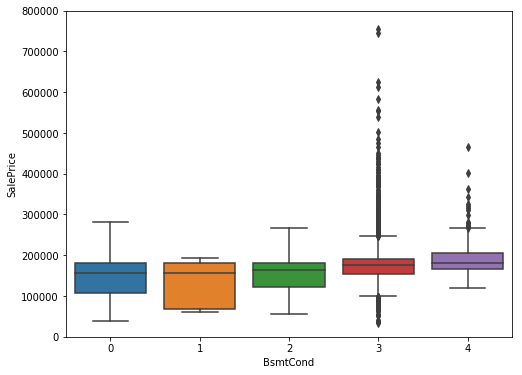

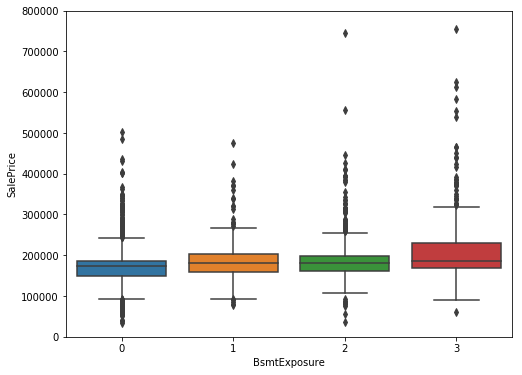

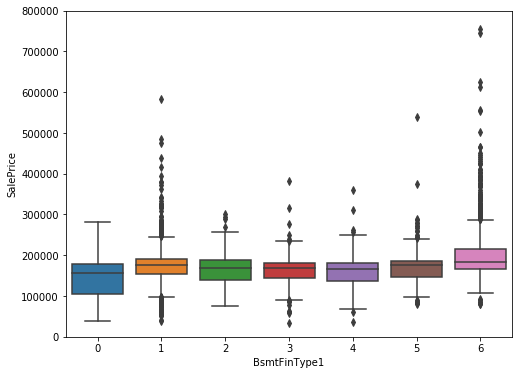

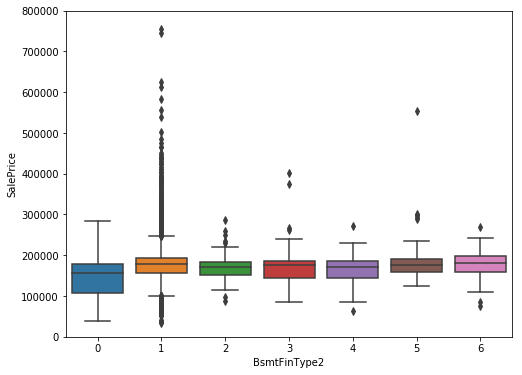

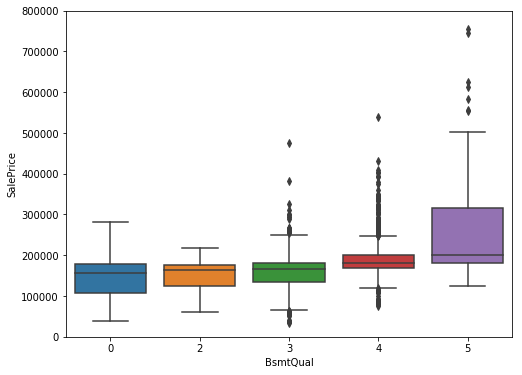

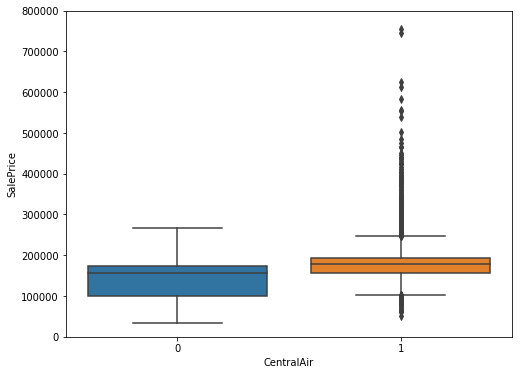

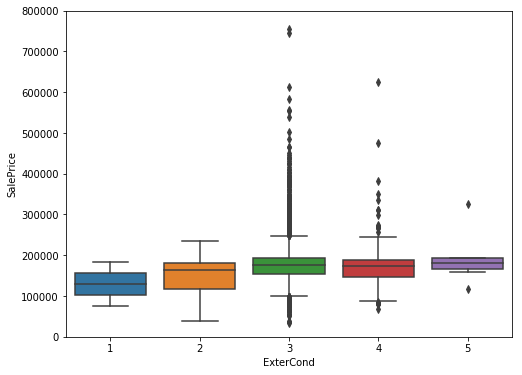

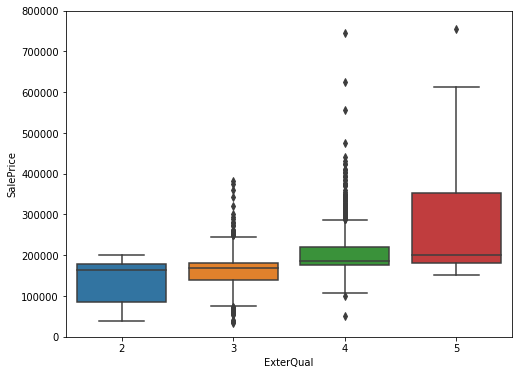

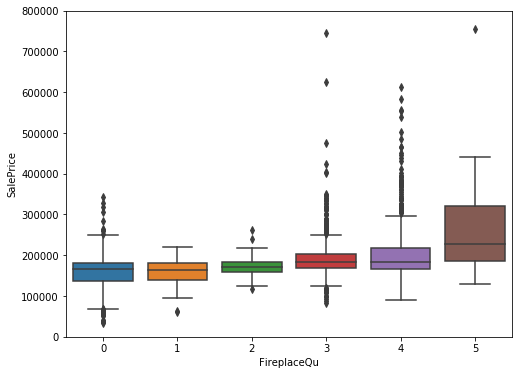

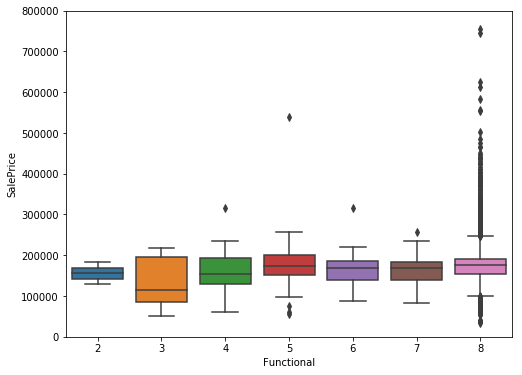

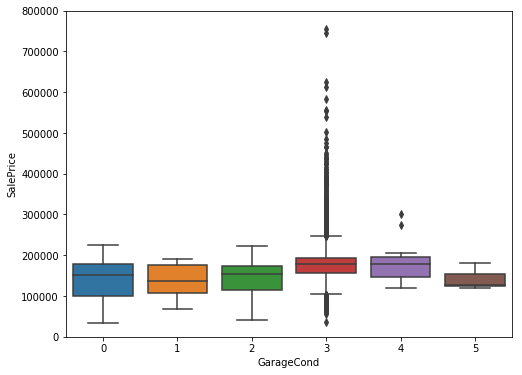

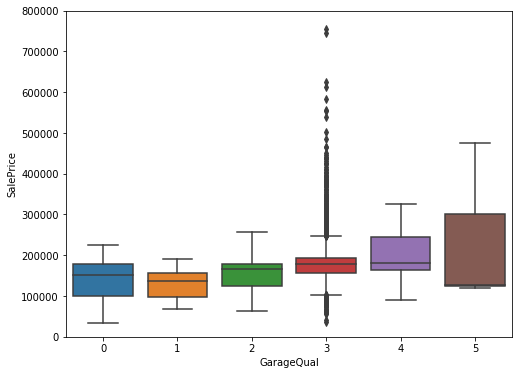

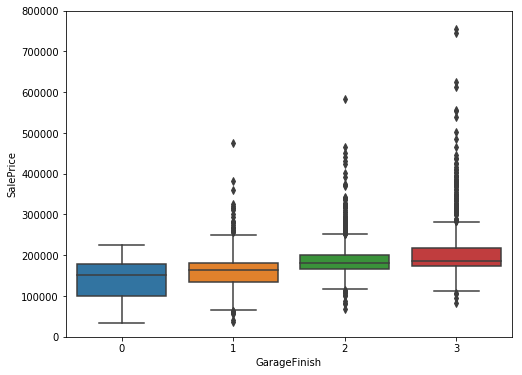

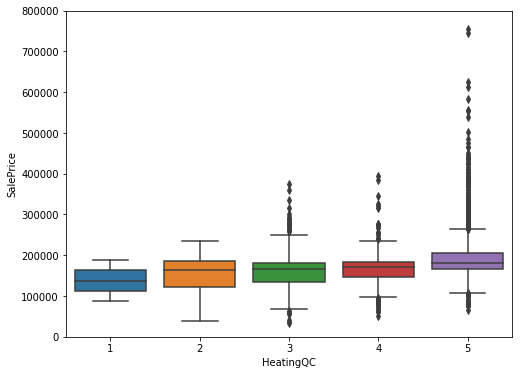

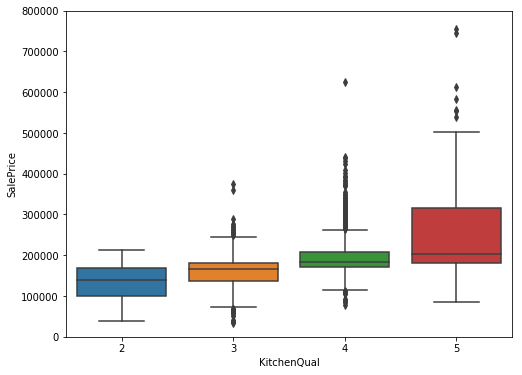

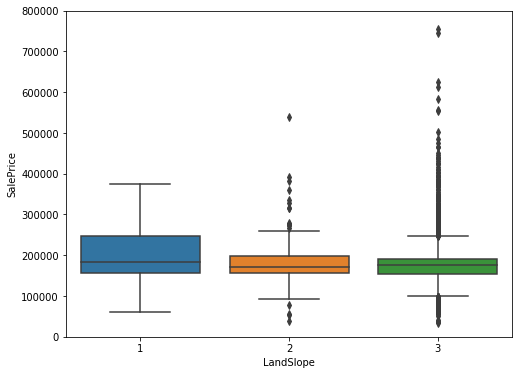

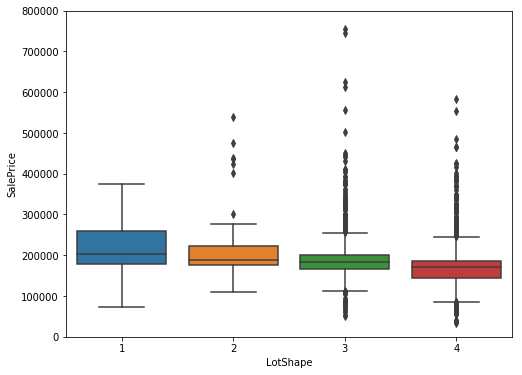

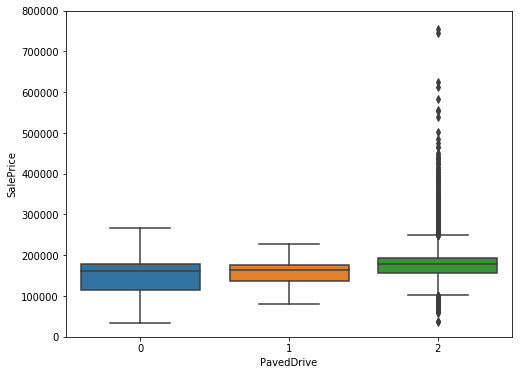

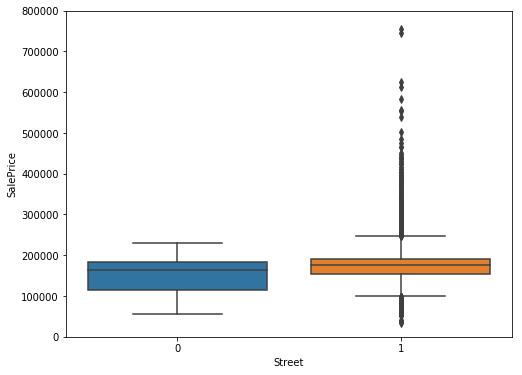

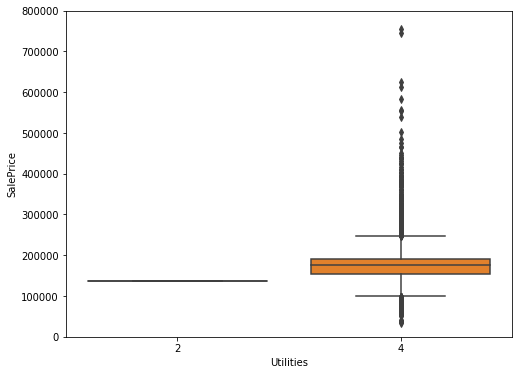

In [551]:
for var in categorical_to_ordinal_encoding:
    dt = pd.concat([data['SalePrice'], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=dt)
    fig.axis(ymin=0, ymax=800000);

In [552]:
categorical_relevant_features = ['BsmtCond','BsmtExposure','BsmtQual','CentralAir','ExterQual','FireplaceQu', 'GarageQual','GarageFinish','HeatingQC','KitchenQual','PavedDrive','Street']

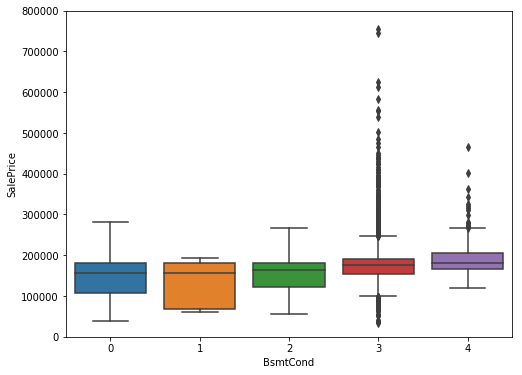

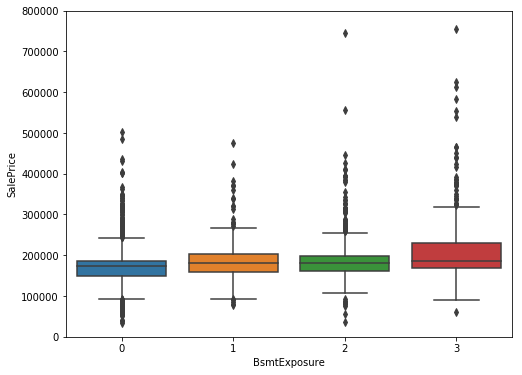

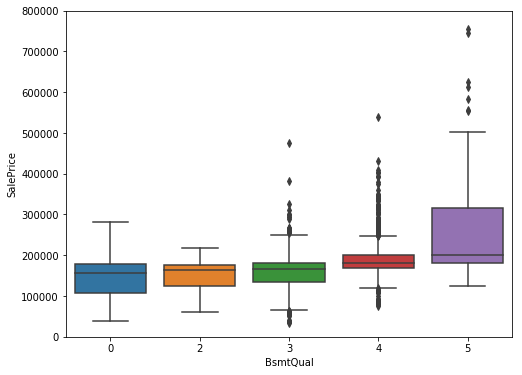

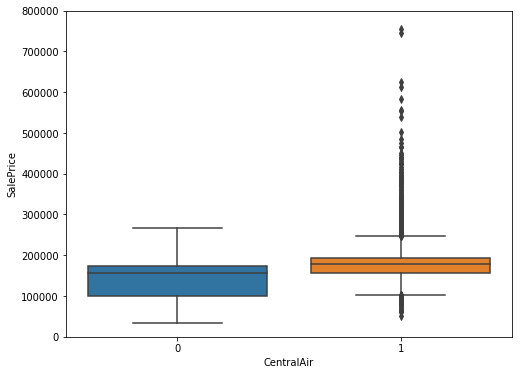

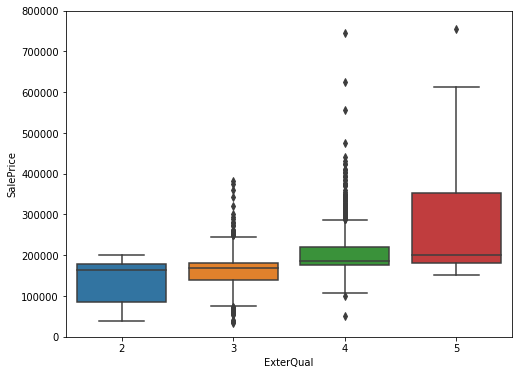

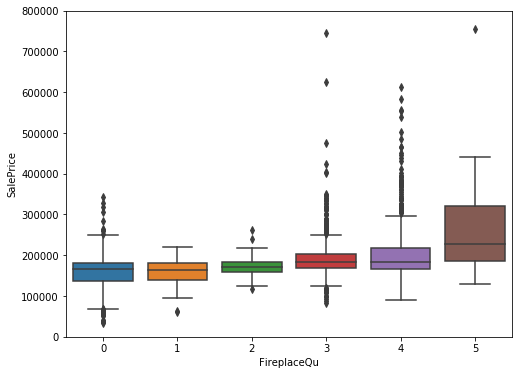

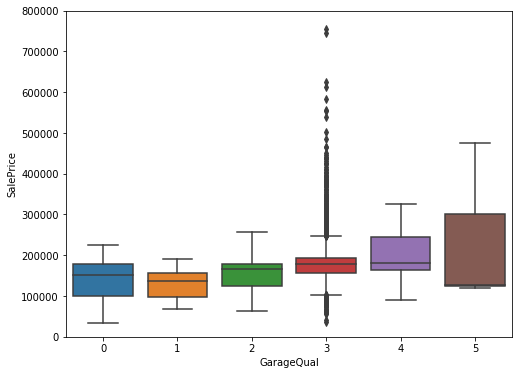

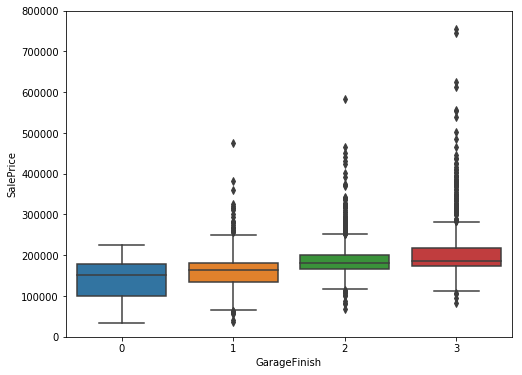

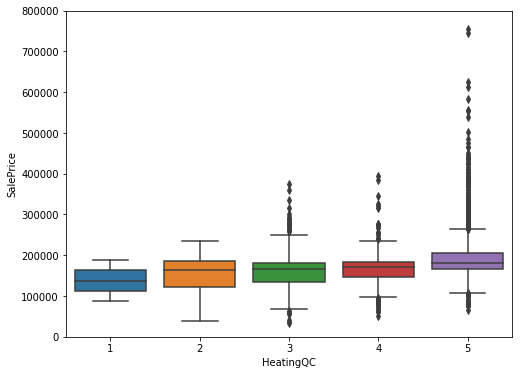

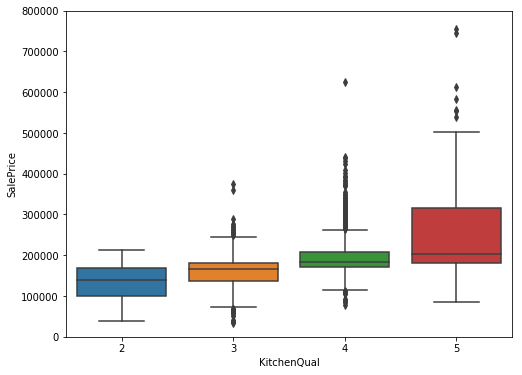

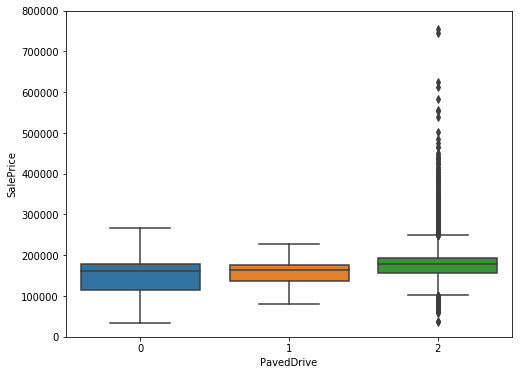

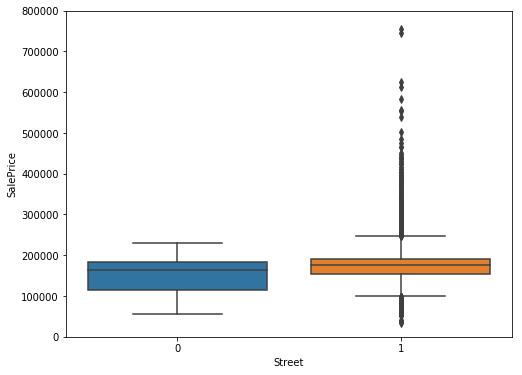

In [553]:
for var in categorical_relevant_features:
    dt = pd.concat([data['SalePrice'], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=dt)
    fig.axis(ymin=0, ymax=800000);
    title = 'boxplot_'+var+'_vs_SalePrice.png'
    plt.savefig(title)

In [554]:
ordinal_numerical_data = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars','MoSold', 'YrSold']

In [555]:
continuous_data = set(numerical_cols)
for i in ordinal_numerical_data:
    continuous_data.discard(i)
continuous_data = list(continuous_data)
continuous_data

['WoodDeckSF',
 'TotalBsmtSF',
 'GarageArea',
 '2ndFlrSF',
 'LowQualFinSF',
 '3SsnPorch',
 'MiscVal',
 'BsmtFinSF1',
 'OpenPorchSF',
 'ScreenPorch',
 'EnclosedPorch',
 'MasVnrArea',
 'GrLivArea',
 'BsmtUnfSF',
 'SalePrice',
 'LotArea',
 'PoolArea',
 'BsmtFinSF2',
 '1stFlrSF']

## Check variables skewness

In [556]:
skewed_feats = data[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness

,Skewed Features
MiscVal,21.927297
PoolArea,16.869055
LotArea,13.086615
LowQualFinSF,12.100134
3SsnPorch,11.356127
KitchenAbvGr,4.293726
BsmtFinSF2,4.154067
EnclosedPorch,4.023850
ScreenPorch,3.942446
BsmtHalfBath,3.923598


In [557]:
data.describe()

,MSSubClass,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,...,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000
mean,57.200069,10127.632864,0.996219,3.599519,3.999312,2.946373,6.096597,5.570987,1971.421794,1984.324854,...,0.002750,0.082159,0.002406,0.865933,0.064627,0.004125,0.008250,0.015813,0.822963,0.084221
std,42.559205,7828.308906,0.061387,0.570492,0.037082,0.248541,1.402721,1.103731,30.235012,20.855203,...,0.052378,0.274654,0.049004,0.340783,0.245909,0.064106,0.090471,0.124773,0.381765,0.277767
min,20.000000,1300.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7450.000000,1.000000,3.000000,4.000000,3.000000,5.000000,5.000000,1954.000000,1965.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,9434.000000,1.000000,4.000000,4.000000,3.000000,6.000000,5.000000,1973.000000,1993.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,11526.000000,1.000000,4.000000,4.000000,3.000000,7.000000,6.000000,2001.000000,2004.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,215245.000000,1.000000,4.000000,4.000000,3.000000,10.000000,9.000000,2010.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Normalize all skewed variables

In [558]:
from scipy.stats import boxcox
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features".format(skewness.shape[0]))
skewed_features = skewness.index
for feat in skewed_features:
    if any(x<=0 for x in data[feat]):
        for i in data.index:
            data.loc[i,feat] += (1 + data[feat].min())
    data[feat] = np.log(data[feat])
    #data[feat], lam = boxcox(data[feat])
    #print('Lambda: ',lam)
    data[feat] = (data[feat] - data[feat].mean())/data[feat].std(ddof=0)

There are 35 skewed numerical features


In [559]:
data = data.sample(frac=1).reset_index(drop=True)
data_train = data[data.index <= 1459]
data_test = data[data.index > 1459]

In [560]:
y = 'SalePrice'
data_train = data_train.sort_values(by='SalePrice')
feature_cols = [x for x in data.columns if x != y]
X_data_train = data_train[feature_cols]
X_data_test = data_test[feature_cols]
y_data_train = data_train[y]
y_data_test = data_test[y]

In [561]:
data_train['SalePrice'].tail()

1064    3.473680
485     3.545091
450     3.900565
1412    4.340369
500     5.062034
Name: SalePrice, dtype: float64

In [562]:
X_data_train.shape

(1460, 211)

## Plot distance matrix in order to see outliers

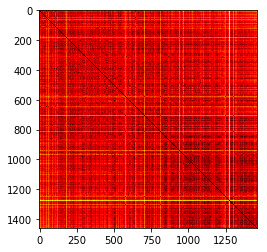

In [563]:
from sklearn.metrics.pairwise import euclidean_distances
from operator import itemgetter
continuous_data.remove('SalePrice')
numerical_cols.remove('SalePrice')
distances = euclidean_distances(X_data_train[numerical_cols],X_data_train[numerical_cols])
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
im = plt.imshow(distances, cmap='hot', interpolation='nearest')
values = np.unique(distances.ravel())
colors = [im.cmap(im.norm(value)) for value in values]
plt.savefig('Heatmap4.png')
plt.show()
plt.close()

In [564]:
outliers = m_sorted[-round(0.15*len(m)):-1]
outliers_index = list()
for i in outliers:
    for j in range(len(m)):
        if m[j] == i:
            outliers_index.append(j)
X_data_train = X_data_train.drop(X_data_train.index[outliers_index])
y_data_train = y_data_train.drop(y_data_train.index[outliers_index])

## Drop 10% of highest avg distance, in order to remove outliers

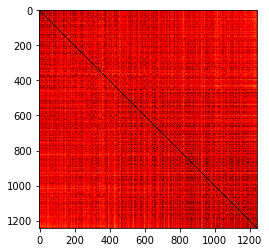

In [565]:
distances = euclidean_distances(X_data_train[numerical_cols],X_data_train[numerical_cols])
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
plt.imshow(distances, cmap='hot', interpolation='nearest')
plt.savefig('Heatmap5.png')
plt.show()
plt.close()

In [566]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=0.9, svd_solver = 'full')
X_reduced = pca.fit_transform(scale(X_data_train[numerical_cols]))

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [567]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([18.99, 29.34, 36.24, 42.47, 48.07, 52.48, 56.27, 59.74, 63.13,
       66.38, 69.44, 72.41, 75.24, 77.83, 80.35, 82.73, 84.9 , 86.81,
       88.59, 90.25])

## Aplying PCA, we reduced the number of variables from 37 to 21, considering 90% of variance explained

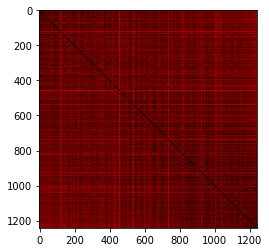

In [568]:
distances = euclidean_distances(X_reduced,X_reduced)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
plt.imshow(distances, cmap='hot', interpolation='nearest')
plt.savefig('Heatmap6.png')
plt.show()
plt.close()

In [569]:
m_sorted[-1]

50.88265857340683

In [570]:
X_data_test.shape

(1449, 211)

In [571]:
X_reduced.shape


(1242, 20)

# IN THIS SECTION, WE WILL CONVERT REGRESSION PROBLEM TO CLASSIFICATION

In [572]:
def limChoice(option, number_of_classes, y_data_train):
    limits = list()
    if option == 'range':
        delta = (y_data_train.max() - y_data_train.min())/number_of_classes
        previous_lim = y_data_train.min()
        for i in range(0,number_of_classes - 1):
            previous_lim = previous_lim + delta
            limits.append(previous_lim)
        #lim1 = y_data_train.min() + delta
        #lim2 = y_data_train.max() - delta
        #print(lim1,lim2)
    else:
        delta = 100/number_of_classes
        previous_percentile = 0
        for i in range(0,number_of_classes - 1):
            previous_percentile += delta
            limits.append(float(np.percentile(y_data_train,previous_percentile)))
        #lim1 = np.percentile(y_data_train,33)
        #lim2 = np.percentile(y_data_train, 66)
    return limits

In [573]:
limits = limChoice('',2,y_data_train)
print(type(limits[0]))

<class 'float'>


In [574]:
limits

[0.09614429421838759]

In [575]:
def getClasses(limits,y_data_train,y_data_test):
    y_classes_train = list()
    y_classes_test = list()
    for value1 in y_data_train:
        #print(value1,limits[0])
        if value1 <= limits[0]:
            y_classes_train.append('barata')
        elif (value1 > limits[0]) and (len(limits)>1) and (value1 <= limits[1]):
            y_classes_train.append('media')
        else:
            y_classes_train.append('cara')

    for value2 in y_data_test:
        if value1 <= limits[0]:
            y_classes_test.append('barata')
        elif (value1 > limits[0]) and (len(limits)>1) and (value1 <= limits[1]):
            y_classes_test.append('media')
        else:
            y_classes_test.append('cara')
    return y_classes_train, y_classes_test

In [576]:
y_classes_train,y_classes_test = getClasses(limits=limits,y_data_train=y_data_train,y_data_test=y_data_test)

In [577]:
pca = PCA(n_components=2, svd_solver = 'full')
X_2D = pca.fit_transform(scale(X_data_train[numerical_cols]))

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


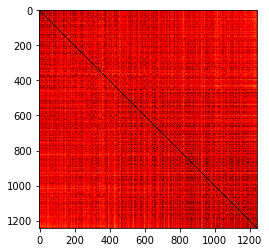

In [578]:
distances = euclidean_distances(X_data_train[numerical_cols],X_data_train[numerical_cols])
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
plt.imshow(distances, cmap='hot', interpolation='nearest')
#plt.savefig('Heatmap6.png')
plt.show()
plt.close()

In [579]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_data_train[numerical_cols], y_classes_train)
X_lda_train = lda.transform(X_data_train[numerical_cols])
X_lda_test = lda.transform(X_data_test[numerical_cols])
#X_lda_test = lda.fit_transform(X_data_test[numerical_cols], y_classes_test)
print(X_lda_train.shape,X_lda_test.shape)

(1242, 1) (1449, 1)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


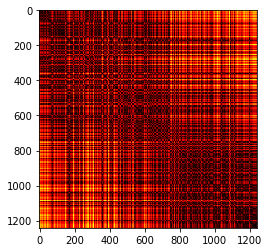

In [580]:
distances = euclidean_distances(X_lda_train,X_lda_train)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
plt.imshow(distances, cmap='hot', interpolation='nearest')
plt.savefig('Heatmap_pos_LDA.png')
plt.show()
plt.close()

In [581]:
def plotClassification(x_data,y_data,img_name):
    caras = np.array([0]*x_data.shape[1])
    medias = np.array([0]*x_data.shape[1])
    baratas = np.array([0]*x_data.shape[1])
    i = 0
    for classe in y_data:
        if classe == 'barata':
            baratas = np.vstack((baratas,x_data[i]))
        elif classe == 'media':
            medias = np.vstack((medias,x_data[i]))
        elif classe == 'cara':
            caras = np.vstack((caras,x_data[i]))
        i += 1
    baratas = np.delete(baratas,0,0)
    medias = np.delete(medias,0,0)
    caras = np.delete(caras,0,0)
    dt = (baratas, medias, caras)
    colors = ("red", "green", "blue")
    groups = ("barata", "media", "cara")
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    #print(dt[0])
    for i in range(len(dt)):
        try:
            x_coordinates = dt[i][:,0]
            y_coordinates = dt[i][:,1]
        except:
            pass
        else:
            ax.scatter(x_coordinates, y_coordinates, alpha=0.8, c=colors[i], edgecolors='none', s=30, label=groups[i])
    plt.legend(loc=2)
    plt.savefig(img_name)
    plt.show()

In [582]:
print(X_lda_test.shape)

(1449, 1)


## Raw data after applied LDA

No handles with labels found to put in legend.


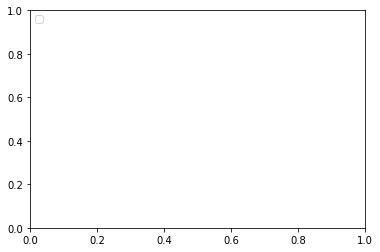

In [583]:
plotClassification(X_lda_train,y_classes_train,'LDA_classes.png')

## Raw data after applied PCA

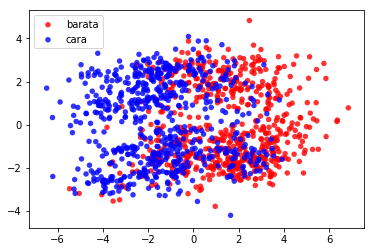

In [584]:
plotClassification(X_2D,y_classes_train,'PCA_classes.png')

In [585]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_classes_train)
y_label_encoded_train = le.transform(y_classes_train)
y_label_encoded_test = le.transform(y_classes_test)

In [586]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [587]:
#le.transform(['barata', 'cara', 'media'])

## FIRST MODEL: LOGISTIC REGRESSION

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
No handles with labels found to put in legend.


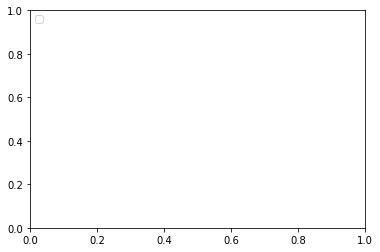

In [588]:
LR = LogisticRegression()
LR = LR.fit(X_lda_train, y_label_encoded_train)
y_predict = LR.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'LDA_classes_predicted.png')

In [589]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [803 646]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.446     0.617      1449

   micro avg      0.446     0.446     0.446      1449
   macro avg      0.500     0.223     0.308      1449
weighted avg      1.000     0.446     0.617      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### LOGISTIC REGRESSION WITH WEIGHTED CLASSES

In [590]:
from collections import Counter
occurencies_frequency = Counter(y_classes_train)
occurencies_frequency

Counter({'barata': 621, 'cara': 621})

In [591]:
type(le.transform(['cara']))
le.transform(['cara'])[0]

1

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
No handles with labels found to put in legend.


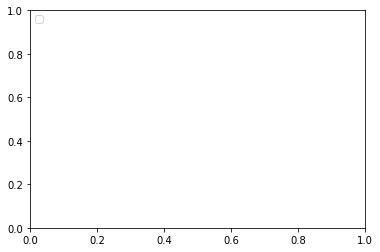

In [592]:
weights = dict()
for classe in le.classes_: 
    weights[le.transform([str(classe)])[0]] = 1- occurencies_frequency[str(classe)]/len(X_lda_train)
#weights[1] = 1- occurencies_frequency['cara']/len(X_lda_train)
#weights[2] = 1- occurencies_frequency['media']/len(X_lda_train)
LR = LogisticRegression(class_weight = weights)
LR = LR.fit(X_lda_train, y_label_encoded_train)
y_predict = LR.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'LDA_classes_weighted_predicted.png')


In [593]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [803 646]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.446     0.617      1449

   micro avg      0.446     0.446     0.446      1449
   macro avg      0.500     0.223     0.308      1449
weighted avg      1.000     0.446     0.617      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## SECOND MODEL: NAIVE BAYES

No handles with labels found to put in legend.


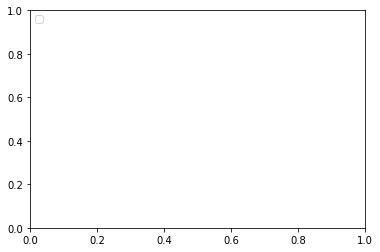

In [594]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_lda_train, y_label_encoded_train)
y_predict = gnb.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'NaiveBayes.png')

In [595]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [796 653]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.451     0.621      1449

   micro avg      0.451     0.451     0.451      1449
   macro avg      0.500     0.225     0.311      1449
weighted avg      1.000     0.451     0.621      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Naive Bayes WITHOUT PRIOR EFFECT

No handles with labels found to put in legend.


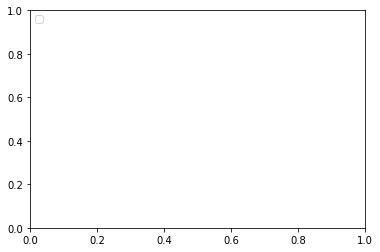

In [596]:
gnb = GaussianNB(priors=[1/len(le.classes_)]*len(le.classes_))
gnb.fit(X_lda_train, y_label_encoded_train)
y_predict = gnb.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'NaiveBayes_noprior.png')

In [597]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [796 653]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.451     0.621      1449

   micro avg      0.451     0.451     0.451      1449
   macro avg      0.500     0.225     0.311      1449
weighted avg      1.000     0.451     0.621      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### QUADRATIC DISCRIMINANT ANALYSIS (BAYESIANO QUADRATICO)

No handles with labels found to put in legend.


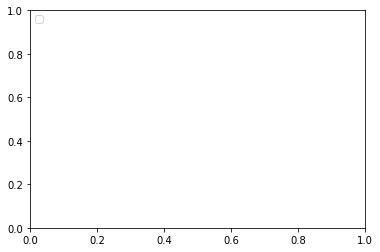

In [598]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_lda_train, y_label_encoded_train)
y_predict = qda.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'QDA.png')

In [599]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [795 654]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.451     0.622      1449

   micro avg      0.451     0.451     0.451      1449
   macro avg      0.500     0.226     0.311      1449
weighted avg      1.000     0.451     0.622      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### QUADRATIC DISCRIMINANT ANALYSIS (BAYESIANO QUADRATICO) - WITHOUT PRIOR EFFECT 

No handles with labels found to put in legend.


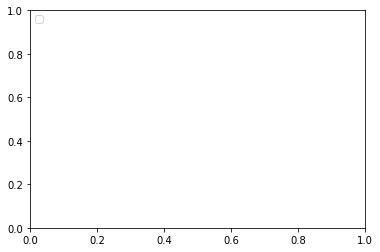

In [600]:
qda = QuadraticDiscriminantAnalysis(priors=[1/len(le.classes_)]*len(le.classes_))
qda.fit(X_lda_train, y_label_encoded_train)
y_predict = qda.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'QDA_noPrior.png')

In [601]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [795 654]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.451     0.622      1449

   micro avg      0.451     0.451     0.451      1449
   macro avg      0.500     0.226     0.311      1449
weighted avg      1.000     0.451     0.622      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### LINEAR DISCRIMINANT ANALYSIS (BAYESIANO LINEAR)

No handles with labels found to put in legend.


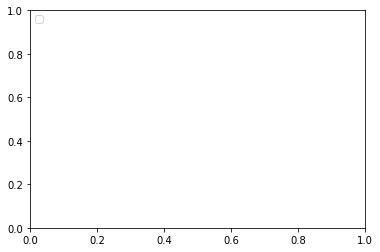

In [602]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_lda_train, y_label_encoded_train)
y_predict = lda.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'LDA.png')

In [603]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [797 652]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.450     0.621      1449

   micro avg      0.450     0.450     0.450      1449
   macro avg      0.500     0.225     0.310      1449
weighted avg      1.000     0.450     0.621      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### LINEAR DISCRIMINANT ANALYSIS (BAYESIANO LINEAR) - NO PRIOR EFFECT

No handles with labels found to put in legend.


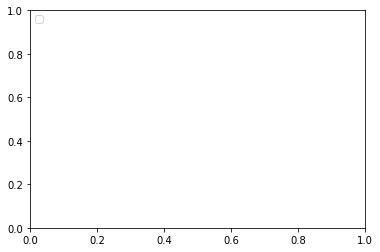

In [604]:
lda = LinearDiscriminantAnalysis(priors=[1/len(le.classes_)]*len(le.classes_))
lda.fit(X_lda_train, y_label_encoded_train)
y_predict = lda.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'LDA_noPrior.png')

In [605]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [797 652]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.450     0.621      1449

   micro avg      0.450     0.450     0.450      1449
   macro avg      0.500     0.225     0.310      1449
weighted avg      1.000     0.450     0.621      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# LOGISTIC REGRESSION, ALL VARIABLES

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
No handles with labels found to put in legend.


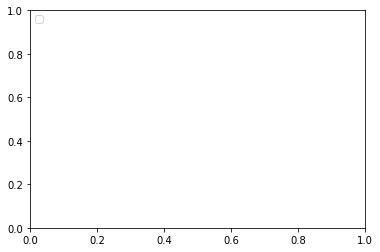

In [606]:
LR = LogisticRegression()
LR = LR.fit(X_data_train, y_label_encoded_train)
y_predict = LR.predict(X_data_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'LDA_classes_predicted.png')

In [607]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [791 658]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.454     0.625      1449

   micro avg      0.454     0.454     0.454      1449
   macro avg      0.500     0.227     0.312      1449
weighted avg      1.000     0.454     0.625      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


No handles with labels found to put in legend.


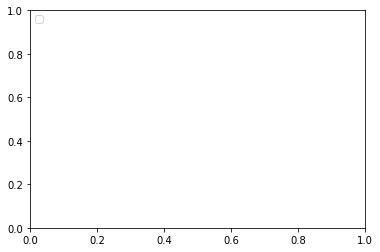

In [608]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=63, random_state=0)
rfc.fit(X_data_train,y_label_encoded_train)
y_predict = rfc.predict(X_data_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'RFC_classes_predicted.png')

In [609]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=i, random_state=0)
    rfc.fit(X_data_train,y_label_encoded_train)
    pred_i = rfc.predict(X_data_test)
    error.append(np.mean(le.inverse_transform(pred_i) != y_classes_test))

Text(0, 0.5, 'Mean Error')

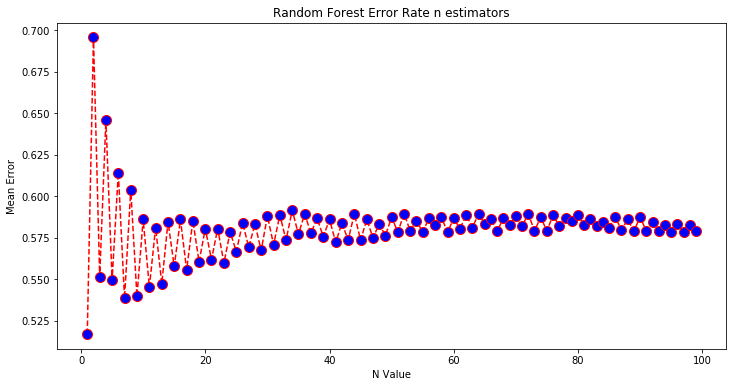

In [610]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Random Forest Error Rate n estimators')
plt.xlabel('N Value')
plt.ylabel('Mean Error')

In [611]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [842 607]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.419     0.590      1449

   micro avg      0.419     0.419     0.419      1449
   macro avg      0.500     0.209     0.295      1449
weighted avg      1.000     0.419     0.590      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [612]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_lda_train,y_label_encoded_train)
y_predict = knn.predict(X_lda_test)

In [613]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [744 705]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.487     0.655      1449

   micro avg      0.487     0.487     0.487      1449
   macro avg      0.500     0.243     0.327      1449
weighted avg      1.000     0.487     0.655      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [614]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_lda_train,y_label_encoded_train)
    pred_i = knn.predict(X_lda_test)
    error.append(np.mean(le.inverse_transform(pred_i) != y_classes_test))

Text(0, 0.5, 'Mean Error')

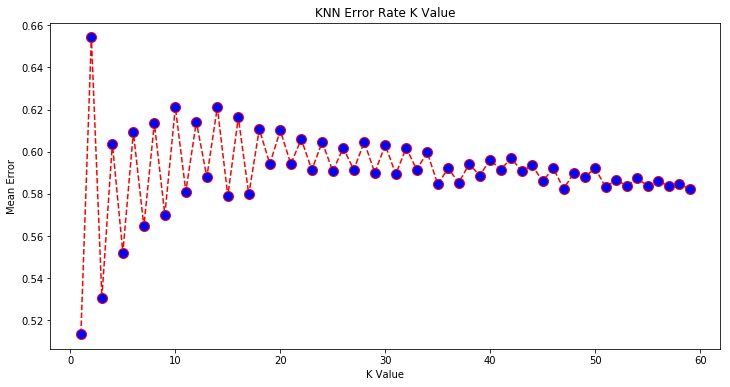

In [615]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('KNN Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [616]:
from sklearn.cluster import KMeans
from sklearn import metrics
silhouette_values = dict()
for i in range(2, 11):
    silhouette_values[i] = list()
    for j in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=1, random_state=j)
        silhouette_values[i].append( metrics.silhouette_score(X_data_train[numerical_cols], kmeans.fit_predict(X_data_train[numerical_cols]) ) )
        

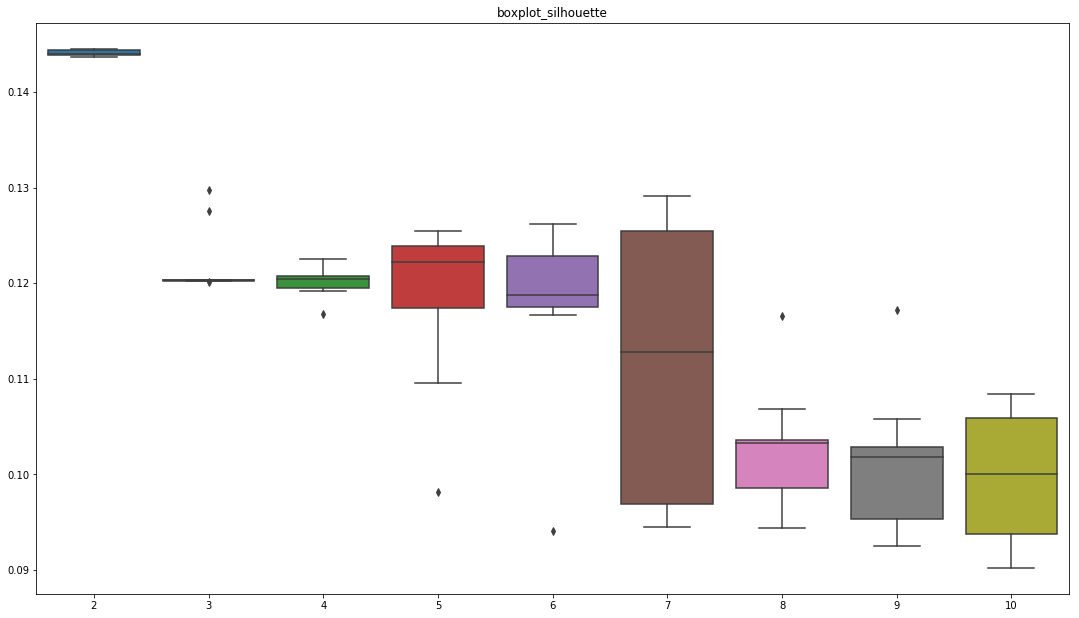

In [617]:
import seaborn as sns
df = pd.DataFrame(silhouette_values)
f, ax = plt.subplots(figsize=(18.5, 10.5))
fig = sns.boxplot(data=df)
fig.set_xticklabels(ax.get_xticklabels())
title = 'boxplot_silhouette'
ax.set_title(title)
plt.savefig(title+'.png')

In [618]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_data_train[numerical_cols])

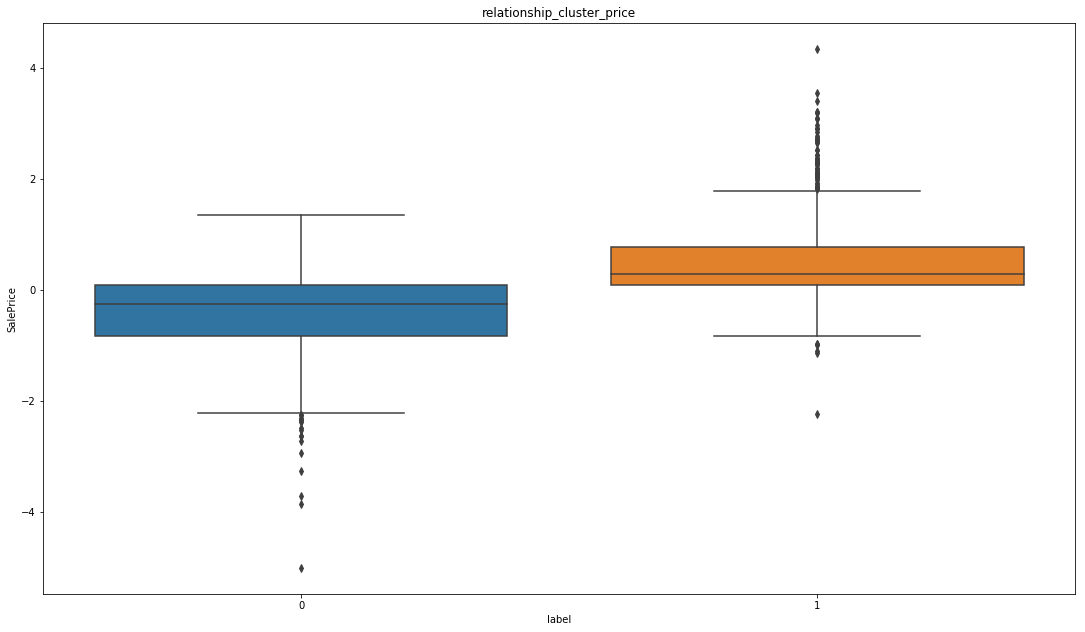

In [619]:
relationship_cluster_price = pd.DataFrame({'SalePrice':list(y_data_train),'label':labels})
f, ax = plt.subplots(figsize=(18.5, 10.5))
fig = sns.boxplot(x = 'label',y='SalePrice',data=relationship_cluster_price)
fig.set_xticklabels(ax.get_xticklabels())
title = 'relationship_cluster_price'
ax.set_title(title)
plt.savefig(title+'.png')

In [620]:
from sklearn.base import BaseEstimator, ClassifierMixin
from cvxopt import matrix, solvers
def _kernel_function(center, sigma, data_point):
    return np.exp(-1*(np.linalg.norm(np.subtract(center,data_point))**2 )/ (2 * sigma**2) )

class RBFN(BaseEstimator,ClassifierMixin):
    def __init__(self, hidden_shape, sigma = None, centers=None, weights=None, mode = 'classifier'):
        """ radial basis function network
        # Arguments
            input_shape: dimension of the input data
            e.g. scalar functions have should have input_dimension = 1
            hidden_shape: number of hidden radial basis functions,
            also, number of centers.
        """
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = centers
        self.weights = weights
        self.mode = mode
        
    def getIndicatorVariables(self,class_vector):
        numpy_class_vector = np.asarray(class_vector)
        classes_identified = np.unique(numpy_class_vector)
        output_dict = dict()
        for cur_class in classes_identified:
            output_dict[cur_class] = list()
        for element in class_vector:
            for key in output_dict.keys():
                output_dict[key].append(-1)
            #substitui o valor do último elemento da lista (-1) por 1 pois é a classe correspondente
            output_dict[element][-1] = 1
        return pd.DataFrame(output_dict)
    
    def getClassFromIndicatorVariables(self,indicator_variables):
        classes = list()
        for row in range(0,len(indicator_variables)): 
            for column in indicator_variables.columns:
                if indicator_variables.iloc[row][column] == 1:
                    classes.append(column)
        return classes       
        
    def getRBF_Centers_And_Std(self,X_data_train):    
        num_clusters = self.hidden_shape
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=1, random_state=0)
        kmeans.fit(X_data_train)
        centers = kmeans.cluster_centers_
        distances = euclidean_distances(centers,centers)
        stds = list()
        for j in range(0,num_clusters):
            distance_to_other_centers = np.delete(distances[j],j)
            stds.append(distance_to_other_centers[np.argmin(distance_to_other_centers)])
        return centers,stds
    
    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: Training data
        # Input shape
            (num_data_samples, input_shape)
        # Returns
            U: Interpolation matrix
        """
        U = np.zeros((len(X), self.hidden_shape))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                U[data_point_arg, center_arg] = _kernel_function(np.asarray(center), self.sigma[center_arg], np.asarray(data_point))
        return np.c_[np.ones(len(X)),U]
    
    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: training samples
            Y: targets
        # Input shape
            X: (num_data_samples, input_shape)
            Y: (num_data_samples, input_shape)
        """
        solvers.options['show_progress'] = False
        self.centers, self.sigma = self.getRBF_Centers_And_Std(X)
        if self.mode == 'classifier':
            Y_RBF = self.getIndicatorVariables(Y)
            #print("Encoded Y:\n\n",Y_RBF.shape)
        else:
            Y_RBF = Y
        Y_RBF = np.asarray(Y_RBF)
        X = np.asarray(X)
        U = self._calculate_interpolation_matrix(X)
        P = matrix(np.matmul(U.transpose(), U))
        G = matrix(np.r_[-np.eye(self.hidden_shape + 1),np.eye(self.hidden_shape + 1)])
        h = matrix([np.sqrt(self.hidden_shape)]*2*(self.hidden_shape + 1))
        solution = np.ones(self.hidden_shape + 1)
        for i in range(len(Y_RBF[0])):
            q = matrix(-1*np.matmul(U.transpose(),Y_RBF[:,i]))
            #print(q)
            solution = np.c_[solution,solvers.qp(P,q,G,h)['x']]
        #delete the 1 vector:
        solution = np.delete(solution,0,1)
        self.weights = solution
        #self.weights = np.dot(np.matmul(np.linalg.pinv(result),U.transpose()), Y)
        
    def predict(self, X):
        """
        # Arguments
            X: test data
        # Input shape
            (num_test_samples, input_shape)
        """
        U = self._calculate_interpolation_matrix(np.asarray(X))
        predictions = np.dot(U, self.weights)
        if self.mode == 'classifier':
            for row in range(0,len(predictions)):
                maximum = np.max(predictions[row])
                not_assigned = True
                for column in range(0,len(predictions[0])):
                    if (predictions[row][column] == maximum) & not_assigned:
                        predictions[row][column] = 1
                        not_assigned = False
                    else:
                        predictions[row][column] = -1
            #predictions[predictions > 0] = 1
            #predictions[predictions <= 0] = -1
            predictions_df = pd.DataFrame.from_records(data=predictions)
            #print("Predictions: \n\n",predictions_df.shape)
            return self.getClassFromIndicatorVariables(predictions_df)
        return predictions
        #,colummns=np.arange(len(predictions[0]))
      
    def predict_proba(self, X):
        U = self._calculate_interpolation_matrix(X)
        predictions = np.dot(U, self.weights)
        
        return predictions

In [621]:
rbfn_instance=RBFN(2,None,None,None)
rbfn_instance.fit(X_data_train, y_label_encoded_train)
y_predict = rbfn_instance.predict(X_data_test)

Encoded Y:

 (1242, 2)


In [622]:
print(len(X_data_test[numerical_cols]),len(y_predict))

1449 1449


In [623]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[  0   0]
 [824 625]]
              precision    recall  f1-score   support

      barata      0.000     0.000     0.000         0
        cara      1.000     0.431     0.603      1449

   micro avg      0.431     0.431     0.431      1449
   macro avg      0.500     0.216     0.301      1449
weighted avg      1.000     0.431     0.603      1449



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [624]:
from sklearn.model_selection import cross_val_score
rbf_cv_results = cross_val_score(estimator = rbfn_instance, X = X_data_train[numerical_cols], y = y_label_encoded_train, cv = 10)

Encoded Y:

 (1116, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)


In [625]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC 
pca = PCA(n_components=0.9, svd_solver = 'full')
X_reduced = pca.fit_transform(scale(X_data_train))
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
LR = LogisticRegression()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
rbfn_instance=RBFN(2,None,None,None)
svc = SVC(gamma='scale')
clf = [rfc, knn, svc, LR, gnb, lda, qda, rbfn_instance]
eclf = VotingClassifier(estimators=[('Random Forests', rfc), ('Logistic Regression', LR), ('KNeighbors', knn), ('SVC', svc), ('GNB', gnb), ('LDA', lda), ('QDA',qda),('RBF', rbfn_instance)], voting='hard')
for clf, label in zip([rfc,LR,knn,svc,gnb,lda,qda,rbfn_instance, eclf], ['Random Forests','Logistic Regression','KNeighbors','SVC','GNB','LDA','QDA','RBF', 'Ensemble']):
    scores = cross_val_score(clf, X_reduced, y_label_encoded_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Accuracy: 0.75 (+/- 0.02) [Random Forests]


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

Accuracy: 0.77 (+/- 0.04) [Logistic Regression]
Accuracy: 0.68 (+/- 0.02) [KNeighbors]
Accuracy: 0.77 (+/- 0.03) [SVC]
Accuracy: 0.60 (+/- 0.06) [GNB]
Accuracy: 0.78 (+/- 0.05) [LDA]
Accuracy: 0.70 (+/- 0.07) [QDA]
Encoded Y:

 (1116, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Encoded Y:

 (1118, 2)
Accuracy: 0.69 (+/- 0.05) [RBF]


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1116, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Encoded Y:

 (1118, 2)
Accuracy: 0.76 (+/- 0.03) [Ensemble]
